# GANs in Action 

한빛출판사에서 옮긴 GANs in Action을 공부하며 코드를 따라가는 노트북입니다.

In [1]:
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model
import numpy as np

In [115]:
#set hyperparameter

batch_size = 100
original_dim = 784 # Flatten 28*28 vector
latent_dim = 2
intermediate_dim = 128 #autoencoder hidden layer dim
epochs = 50
epsilon_std = 1.0

In [2]:
def sampling(args: tuple):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean= 0., stddev= epsilon_std)
    return z_mean + K.exp(z_log_var/2) * epsilon

In [117]:
#make encoder 

x = Input(shape=(original_dim), name= 'Input')
h = Dense(intermediate_dim, activation = 'relu', name= 'encoding')(x)

z_mean = Dense(latent_dim, name= 'mean')(h)
z_log_var = Dense(latent_dim, name= 'log_variance')(h)

z = Lambda(sampling, output_shape = (latent_dim,))([z_mean, z_log_var])
encoder = Model(x, [z_mean, z_log_var, z], name= 'encoder')

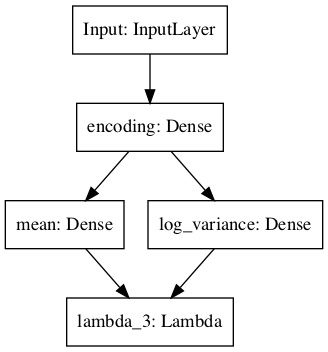

In [118]:
plot_model(encoder)

In [119]:
#make decoder

input_decoder = Input(shape=(latent_dim,), name= 'decode_input')
decoder_h = Dense(intermediate_dim, activation = 'relu', name= 'decoder_h')(input_decoder)
x_decoded = Dense(original_dim, activation= 'sigmoid', name= 'flat_decoded')(decoder_h)
decoder = Model(input_decoder, x_decoded, name = 'decoder')

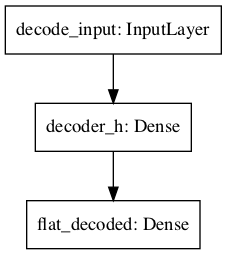

In [120]:
plot_model(decoder)

In [121]:
#combine
output_combine = decoder(encoder(x)[2])
vae = Model(x, output_combine, )
vae.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
encoder (Functional)         [(None, 2), (None, 2), (N 100996    
_________________________________________________________________
decoder (Functional)         (None, 784)               101520    
Total params: 202,516
Trainable params: 202,516
Non-trainable params: 0
_________________________________________________________________


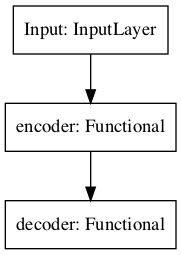

In [122]:
plot_model(vae)

In [123]:
kl_loss = -0.5 * K.sum(
          1 + z_log_var - K.exp(z_log_var) - K.square(z_mean), axis= 1)
vae.add_loss(K.mean(kl_loss)/784.)
vae.compile(optimizer= 'rmsprop', loss='binary_crossentropy')
vae.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 784)]        0                                            
__________________________________________________________________________________________________
encoder (Functional)            [(None, 2), (None, 2 100996      Input[0][0]                      
__________________________________________________________________________________________________
decoder (Functional)            (None, 784)          101520      encoder[0][2]                    
__________________________________________________________________________________________________
encoding (Dense)                (None, 128)          100480      Input[0][0]                      
_______________________________________________________________________________________

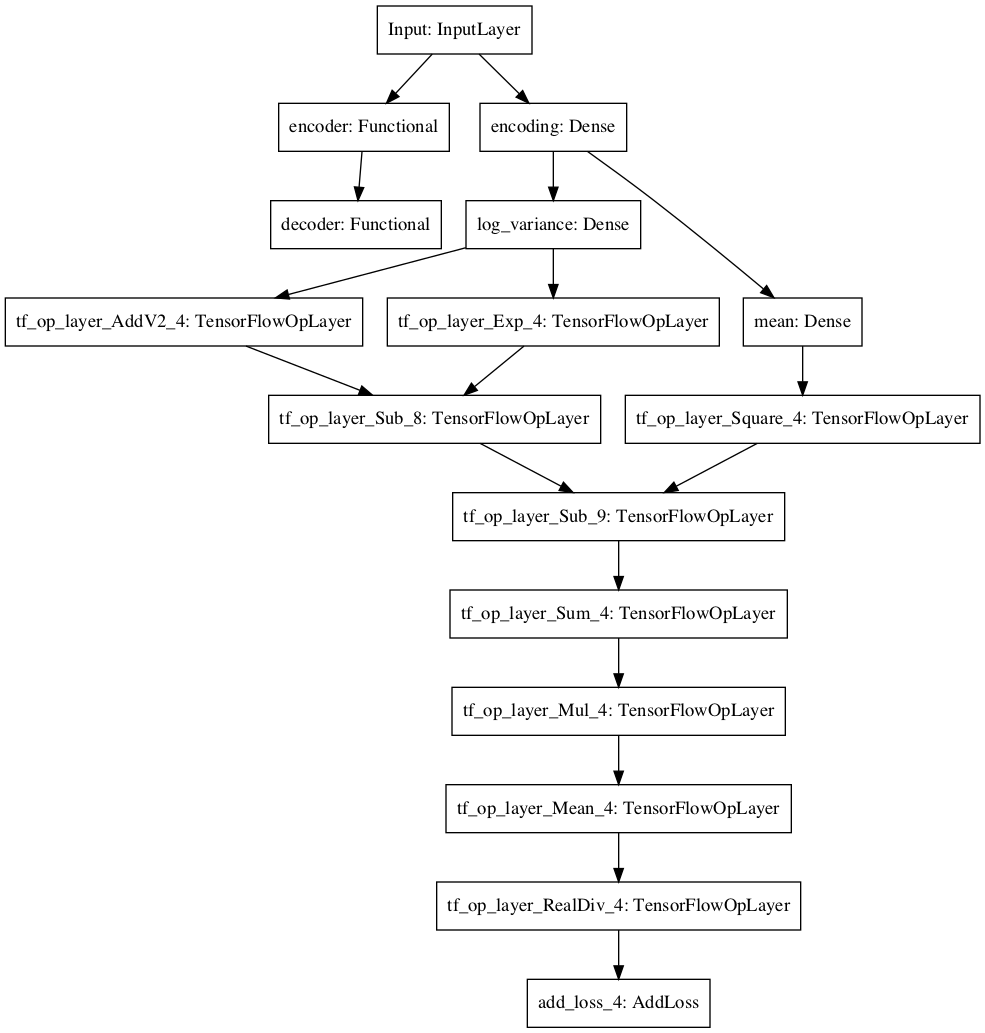

In [140]:
plot_model(vae)

In [124]:
(X_train, Y_train), (X_valid, Y_valid) = mnist.load_data()

X_train = X_train.astype('float32') / 255.
X_valid = X_valid.astype('float32') / 255.

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_valid = X_valid.reshape((len(X_valid), np.prod(X_valid.shape[1:])))

In [125]:
vae.fit(X_train, X_train,
       shuffle= True,
       epochs= epochs,
       batch_size = batch_size,
       validat)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
600/600 [==============================] - 2s 3ms/step - loss: 0.2531
Epoch 2/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2198
Epoch 3/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2149
Epoch 4/50
600/600 [==============================] - 2s 3ms/step - loss: 0.2121
Epoch 5/50
600/600 [==============================] - 

In [128]:
predict = vae.predict(X_train)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


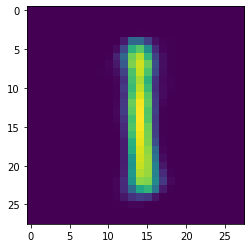

In [131]:
plt.imshow(predict[14].reshape((28, 28)))

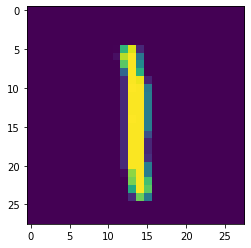

In [133]:
plt.imshow(X_train[14].reshape((28,28)))

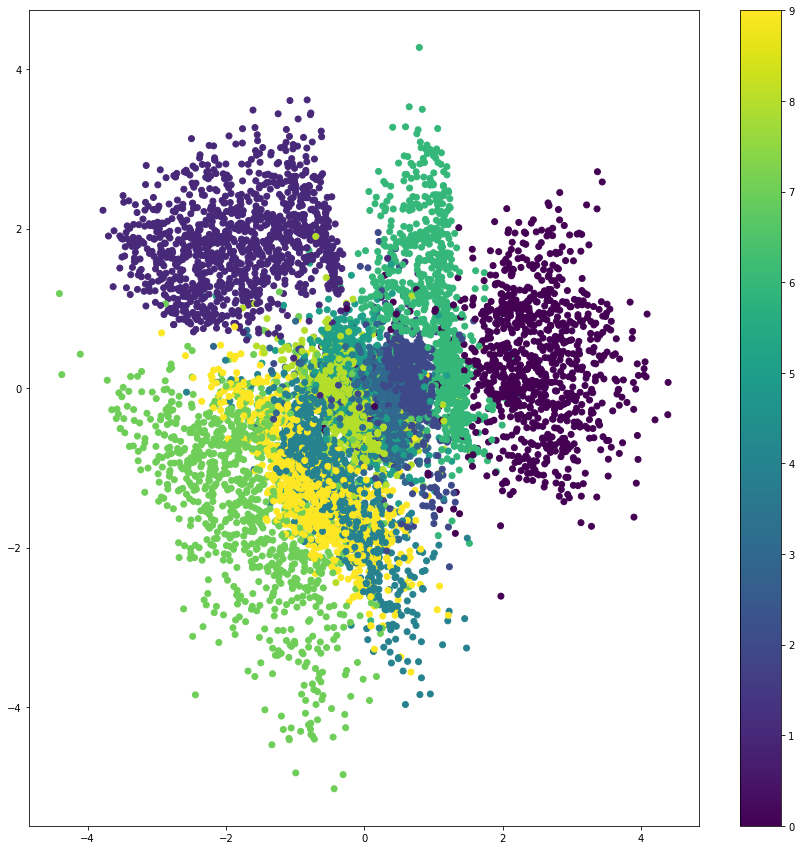

In [98]:
X_valid_encoded = encoder.predict(X_valid, batch_size=batch_size)[0]
plt.figure(figsize=(15, 15))
plt.scatter(X_valid_encoded[:,0], X_valid_encoded[:,1], c=Y_valid, cmap='viridis')
plt.colorbar()
plt.show()

In [83]:
a = encoder.predict(X_valid, batch_size=batch_size)

In [95]:
15 * 28

420

In [96]:
a[2]

array([[-2.9641132 , -1.1054012 ],
       [ 0.7575944 , -0.2949502 ],
       [-2.2051466 ,  2.7897463 ],
       ...,
       [-1.108813  , -0.5918445 ],
       [-0.37993956,  0.50218314],
       [ 1.0877544 ,  0.8967447 ]], dtype=float32)

In [146]:
b = decoder.predict(a)

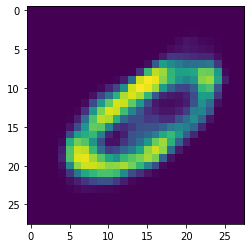

In [150]:
plt.imshow(b[0].reshape((28, 28)))

# 그림 한장에 대한 정보를 오토인코더로 압축 후 재현

In [3]:
import cv2

In [4]:
image = cv2.imread('alex-iby-cNgsAdd4-m4-unsplash.jpg')

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
img_vector = image.shape[0] * image.shape[1] # Flatten 6000*4000 vector
batch_size = 1
latent_dim = 2
intermediate_dim = 6000 #autoencoder hidden layer dim
epochs = 50
epsilon_std = 1.0

In [ ]:
#make encoder 

x = Input(shape=(img_vector), name= 'Input')
h = Dense(intermediate_dim, activation = 'relu', name= 'encoding')(x)

z_mean = Dense(latent_dim, name= 'mean')(h)
z_log_var = Dense(latent_dim, name= 'log_variance')(h)

z = Lambda(sampling, output_shape = (latent_dim,))([z_mean, z_log_var])
encoder = Model(x, [z_mean, z_log_var, z], name= 'encoder')

In [69]:
#make decoder

input_decoder = Input(shape=(latent_dim,), name= 'decode_input')
decoder_h = Dense(intermediate_dim, activation = 'relu', name= 'decoder_h')(input_decoder)
x_decoded = Dense(img_vector, activation= 'sigmoid', name= 'flat_decoded')(decoder_h)
decoder = Model(input_decoder, x_decoded, name = 'decoder')

In [70]:
#combine
output_combine = decoder(encoder(x)[2])
vae = Model(x, output_combine, )
vae.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
encoder (Functional)         [(None, 2), (None, 2), (N 100996    
_________________________________________________________________
decoder (Functional)         (None, 784)               101520    
Total params: 202,516
Trainable params: 202,516
Non-trainable params: 0
_________________________________________________________________


In [71]:
kl_loss = -0.5 * K.sum(
          1 + z_log_var - K.exp(z_log_var) - K.square(z_mean), axis= 1)
vae.add_loss(K.mean(kl_loss)/784.)
vae.compile(optimizer= 'rmsprop', loss='binary_crossentropy')
vae.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 784)]        0                                            
__________________________________________________________________________________________________
encoder (Functional)            [(None, 2), (None, 2 100996      Input[0][0]                      
__________________________________________________________________________________________________
decoder (Functional)            (None, 784)          101520      encoder[0][2]                    
__________________________________________________________________________________________________
encoding (Dense)                (None, 128)          100480      Input[0][0]                      
_______________________________________________________________________________________